In [1]:
# importing required libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading csv file
df=pd.read_excel('Data Model - Pizza Sales.xlsx')

In [3]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [5]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [6]:
#Total no. of pizzas and list of pizza

pizza_list=df['pizza_name'].unique().tolist()
print(f'Total number of pizza types are {len(pizza_list)}\n')
print(f'Types of Pizza list: \n\n{pizza_list}')

Total number of pizza types are 32

Types of Pizza list: 

['The Hawaiian Pizza', 'The Classic Deluxe Pizza', 'The Five Cheese Pizza', 'The Italian Supreme Pizza', 'The Mexicana Pizza', 'The Thai Chicken Pizza', 'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza', 'The Greek Pizza', 'The Spinach Supreme Pizza', 'The Green Garden Pizza', 'The Italian Capocollo Pizza', 'The Spicy Italian Pizza', 'The Spinach Pesto Pizza', 'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza', 'The California Chicken Pizza', 'The Pepperoni Pizza', 'The Chicken Pesto Pizza', 'The Big Meat Pizza', 'The Soppressata Pizza', 'The Four Cheese Pizza', 'The Napolitana Pizza', 'The Calabrese Pizza', 'The Italian Vegetables Pizza', 'The Mediterranean Pizza', 'The Pepper Salami Pizza', 'The Spinach and Feta Pizza', 'The Sicilian Pizza', 'The Chicken Alfredo Pizza', 'The Pepperoni, Mushroom, and Peppers Pizza', 'The Brie Carre Pizza']


#### Revenue generated by pizza shop in year <font color=red>**2015**</font>

In [7]:
Total_revenue=df.total_price.sum()
print(f'Total revenue generated in the year 2015 is ${Total_revenue}')

Total revenue generated in the year 2015 is $817860.05


#### Total number of orders received

In [8]:
Total_orders=df.order_id.max()
print(f'Total number of orders in the year 2015 is {Total_orders}')

Total number of orders in the year 2015 is 21350


#### Average order value

In [9]:
avg_order_value=df.groupby('order_id')['total_price'].sum().mean()
print(f'Average order value in the year 2015 is ${round(avg_order_value,2)}')

Average order value in the year 2015 is $38.31


#### Total number of pizzas ordered in the year 2015

In [10]:
pizzas_ordered=df.quantity.sum()
print(f'Total number of pizzas ordered in the year 2015 is {pizzas_ordered}')

Total number of pizzas ordered in the year 2015 is 49574


#### Average number of pizzas made per day

In [11]:

avg_orders=df.groupby('order_date')['quantity'].sum().reset_index(name='orders')
avg_orders.orders.mean()
print(f'Average number of pizzas made per day is {round(avg_orders.orders.mean(),2)}')

Average number of pizzas made per day is 138.47


#### Dates in the year 2015 that have <font color=red>**Not recorded**</font> any sales

In [12]:


#Using pd.date_range() function, which takes start date, end date and frequency as parameters, we provide the values.
my_range = pd.date_range(
  start="2015-01-01", end="2015-12-31")
 
missing_dates=my_range.difference(df['order_date'])
missing_dates
#Pandas.Index.difference() takes the Date column as a parameter and returns all those values which are not in the given set of values.

DatetimeIndex(['2015-09-24', '2015-09-25', '2015-10-05', '2015-10-12',
               '2015-10-19', '2015-10-26', '2015-12-25'],
              dtype='datetime64[ns]', freq=None)

In [13]:
#strftime is used to convert date and time objects to their string representation.
missing_days=missing_dates.strftime('%A')  #parameter %A gives full weekday name i.e. Sunday, Monday etc.
missing_days

Index(['Thursday', 'Friday', 'Monday', 'Monday', 'Monday', 'Monday', 'Friday'], dtype='object')

### We can see that all <font color=red>Mondays in October</font> <mark>recorded No sales</mark> and also the same on <font color=red>Christmas</font>

# 

#### Top 5 expensive pizzas

In [14]:
pizza_price=df.groupby(['pizza_name','unit_price','pizza_size']).size().reset_index(name='C')
pizza_price.sort_values(by='unit_price',ascending=False,inplace=True)
pizza_price.drop('C',inplace=True,axis=1) #removing the column C(count)
pizza_price.head(5)

,pizza_name,unit_price,pizza_size
27,The Greek Pizza,35.95,XXL
26,The Greek Pizza,25.50,XL
4,The Brie Carre Pizza,23.65,S
42,The Italian Vegetables Pizza,21.00,L
10,The California Chicken Pizza,20.75,L


#### Least 5 expensive pizzas

In [15]:
pizza_price.tail(5)

,pizza_name,unit_price,pizza_size
49,The Napolitana Pizza,12.00,S
28,The Green Garden Pizza,12.00,S
58,"The Pepperoni, Mushroom, and Peppers Pizza",11.00,S
31,The Hawaiian Pizza,10.50,S
55,The Pepperoni Pizza,9.75,S


#### Unique pizzas in size 'XL' and 'XXL'

In [16]:
print(df[df['pizza_size'] == 'XL']['pizza_name'].unique())
print(df[df['pizza_size'] == 'XXL']['pizza_name'].unique())

['The Greek Pizza']
['The Greek Pizza']


#### There is only one type of pizza in 'XL' and 'XXL' i.e. <font color=red>**'The Greek Pizza**</font>' in Classic Category

# 

#### Top 5 Most ordered pizzas

In [17]:
# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent

pizza_sales=df.groupby('pizza_name')[['quantity','total_price']].sum().reset_index()

pizza_sale_qty=pizza_sales.sort_values(by='quantity',ascending=False)
pizza_sale_qty.reset_index(drop=True,inplace=True)
pizza_sale_qty.head(5)

,pizza_name,quantity,total_price
0,The Classic Deluxe Pizza,2453,38180.50
1,The Barbecue Chicken Pizza,2432,42768.00
2,The Hawaiian Pizza,2422,32273.25
3,The Pepperoni Pizza,2418,30161.75
4,The Thai Chicken Pizza,2371,43434.25


#### Least ordered pizzas

In [18]:
pizza_sale_qty.tail(5)  # Least 5 ordered Pizzas

,pizza_name,quantity,total_price
27,The Soppressata Pizza,961,16425.75
28,The Spinach Supreme Pizza,950,15277.75
29,The Calabrese Pizza,937,15934.25
30,The Mediterranean Pizza,934,15360.50
31,The Brie Carre Pizza,490,11588.50


#### Pizzas that are generating highest revenue

In [19]:
# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent

pizza_sale_revenue=pizza_sales.sort_values(by='total_price',ascending=False)
pizza_sale_revenue.reset_index(drop=True,inplace=True)
pizza_sale_revenue.head(5)

,pizza_name,quantity,total_price
0,The Thai Chicken Pizza,2371,43434.25
1,The Barbecue Chicken Pizza,2432,42768.00
2,The California Chicken Pizza,2370,41409.50
3,The Classic Deluxe Pizza,2453,38180.50
4,The Spicy Italian Pizza,1924,34831.25


#### Pizzas that are generating lowest revenue

In [20]:
pizza_sale_revenue.tail(5)

,pizza_name,quantity,total_price
27,The Spinach Pesto Pizza,970,15596.00
28,The Mediterranean Pizza,934,15360.50
29,The Spinach Supreme Pizza,950,15277.75
30,The Green Garden Pizza,997,13955.75
31,The Brie Carre Pizza,490,11588.50


##### We can observe that even though <font color=blue>*'The Brie Carre Pizza'*</font> is in top 5 expensive pizzas list, it has generated least revenue  (It is also the most expensive <font color=blue>*'Small'*</font> size pizza in the list)

# 

In [21]:
# Creating a list of pizza categories
category_list=df['pizza_category'].unique()

### Most and least sold pizzas in each pizza category

In [22]:
# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent

pizza_category_sales=df.groupby(['pizza_category','pizza_name'])[['quantity','total_price']].sum().reset_index()
pizza_category_sales.reset_index(drop=True,inplace=True)
pizza_category_sales

,pizza_category,pizza_name,quantity,total_price
0,Chicken,The Barbecue Chicken Pizza,2432,42768.00
1,Chicken,The California Chicken Pizza,2370,41409.50
2,Chicken,The Chicken Alfredo Pizza,987,16900.25
3,Chicken,The Chicken Pesto Pizza,973,16701.75
4,Chicken,The Southwest Chicken Pizza,1917,34705.75
5,Chicken,The Thai Chicken Pizza,2371,43434.25
6,Classic,The Big Meat Pizza,1914,22968.00
7,Classic,The Classic Deluxe Pizza,2453,38180.50
8,Classic,The Greek Pizza,1420,28454.10
9,Classic,The Hawaiian Pizza,2422,32273.25


In [23]:
# idxmax() and idxmin() gives the index value of max and min values
#iloc gives the value/row from the dataframe with parameter as index value
# loc gives the index value of the given parameter

max_sale_pizza=pd.DataFrame()
for i in category_list:
    sr_row=pizza_category_sales.iloc[pizza_category_sales.loc[pizza_category_sales['pizza_category']==i]['quantity'].idxmax()]
    max_sale_pizza=max_sale_pizza.append(sr_row,ignore_index=True)

min_sale_pizza=pd.DataFrame() 
for i in category_list:
    sr_row=pizza_category_sales.iloc[pizza_category_sales.loc[pizza_category_sales['pizza_category']==i]['quantity'].idxmin()]
    min_sale_pizza=min_sale_pizza.append(sr_row,ignore_index=True)
    
#append() method appends a DataFrame-like object at the end of the current DataFrame
#ignore_index in append resets the index values of the dataframes appended

#### Most selling pizza in each category

In [24]:
max_sale_pizza

,pizza_category,pizza_name,quantity,total_price
0,Classic,The Classic Deluxe Pizza,2453.0,38180.5
1,Veggie,The Four Cheese Pizza,1902.0,32265.7
2,Supreme,The Sicilian Pizza,1938.0,30940.5
3,Chicken,The Barbecue Chicken Pizza,2432.0,42768.0


#### Least selling pizza in each category

In [25]:
min_sale_pizza

,pizza_category,pizza_name,quantity,total_price
0,Classic,"The Pepperoni, Mushroom, and Peppers Pizza",1359.0,18834.50
1,Veggie,The Mediterranean Pizza,934.0,15360.50
2,Supreme,The Brie Carre Pizza,490.0,11588.50
3,Chicken,The Chicken Pesto Pizza,973.0,16701.75


# 

In [26]:
# Creating a list of pizza sizes to use it when sorting dataframe using "pd.Categorical"

pizza_size_list=['S', 'M', 'L', 'XL', 'XXL']

### Pizzas sales according to each size and category

In [27]:
pizza_size_sales=df.groupby(['pizza_size','pizza_category','pizza_name'])[['quantity','total_price']].sum().reset_index()

#sorting the data by pizza_size based on size using "pd.Categorical"
pizza_size_sales['pizza_size'] = pd.Categorical(pizza_size_sales['pizza_size'], pizza_size_list)
pizza_size_sales.sort_values(by=['pizza_size','pizza_category','quantity'],ascending=[True,True,False],inplace=True)

pizza_size_sales.reset_index(drop=True,inplace=True)
pizza_size_sales

,pizza_size,pizza_category,pizza_name,quantity,total_price
0,S,Chicken,The California Chicken Pizza,499,6362.25
1,S,Chicken,The Barbecue Chicken Pizza,484,6171.00
2,S,Chicken,The Thai Chicken Pizza,480,6120.00
3,S,Chicken,The Southwest Chicken Pizza,367,4679.25
4,S,Chicken,The Chicken Pesto Pizza,298,3799.50
...,...,...,...,...,...
86,L,Veggie,The Spinach Pesto Pizza,284,5893.00
87,L,Veggie,The Italian Vegetables Pizza,190,3990.00
88,L,Veggie,The Green Garden Pizza,95,1923.75
89,XL,Classic,The Greek Pizza,552,14076.00


In [28]:
# idxmax() and idxmin() gives the index value of max and min values
#iloc gives the value/row from the dataframe with parameter as index value
# loc gives the index value of the given parameter


max_sale_pizza_size=pd.DataFrame()
for i in pizza_size_list:
    for j in category_list:
        try:
            sr_row=pizza_size_sales.iloc[pizza_size_sales.loc[(pizza_size_sales['pizza_size']==i) & (pizza_size_sales['pizza_category']==j)]['quantity'].idxmax()]
        except ValueError:
            pass
        max_sale_pizza_size=max_sale_pizza_size.append(sr_row,ignore_index=True)


min_sale_pizza_size=pd.DataFrame()
for i in pizza_size_list:
    for j in category_list:
        try:
            sr_row=pizza_size_sales.iloc[pizza_size_sales.loc[(pizza_size_sales['pizza_size']==i) & (pizza_size_sales['pizza_category']==j)]['quantity'].idxmin()]
        except ValueError:
            pass
        min_sale_pizza_size=min_sale_pizza_size.append(sr_row,ignore_index=True)
        
# Using trial and error method because not every pizza is present in all sizes and categories and this raises value error

#append() method appends a DataFrame-like object at the end of the current DataFrame
#ignore_index in append resets the index values of the dataframes appended

#### Most selling pizza in each size and category

In [29]:
max_sale_pizza_size

,pizza_size,pizza_category,pizza_name,quantity,total_price
0,S,Classic,The Big Meat Pizza,1914.0,22968.00
1,S,Veggie,The Green Garden Pizza,600.0,7200.00
2,S,Supreme,The Sicilian Pizza,751.0,9199.75
3,S,Chicken,The California Chicken Pizza,499.0,6362.25
4,M,Classic,The Classic Deluxe Pizza,1181.0,18896.00
5,M,Veggie,The Vegetables + Vegetables Pizza,635.0,10160.00
6,M,Supreme,The Italian Supreme Pizza,941.0,15526.50
7,M,Chicken,The Barbecue Chicken Pizza,956.0,16013.00
8,L,Classic,The Hawaiian Pizza,919.0,15163.50
9,L,Veggie,The Five Cheese Pizza,1409.0,26066.50


#### Least selling pizza in each size and category

In [30]:
min_sale_pizza_size

,pizza_size,pizza_category,pizza_name,quantity,total_price
0,S,Classic,The Italian Capocollo Pizza,302.0,3624.00
1,S,Veggie,The Mexicana Pizza,162.0,1944.00
2,S,Supreme,The Calabrese Pizza,99.0,1212.75
3,S,Chicken,The Chicken Alfredo Pizza,96.0,1224.00
4,M,Classic,The Greek Pizza,281.0,4496.00
5,M,Veggie,The Mediterranean Pizza,275.0,4400.00
6,M,Supreme,The Spinach Supreme Pizza,267.0,4405.50
7,M,Chicken,The Chicken Pesto Pizza,276.0,4623.00
8,L,Classic,The Greek Pizza,255.0,5227.50
9,L,Veggie,The Green Garden Pizza,95.0,1923.75


#### Since there is only one type and category of Pizza in XL and XXL, only that is displayed in in both max and min list

# 

#### Creating a new column for Day of the week of each given date

1st approach: Using 'for' loop and strftime function to create a new column for Weekdays (time taking approach)

In [31]:
#strftime is used to convert date and time objects to their string representation.
arr1 = []
for values in df['order_date']:
    arr1.append(values.strftime('%A'))    #parameter %A gives full weekday name i.e. Sunday, Monday etc.
df['order_day'] = arr1

2nd Approach: Using dt function to create a new column for weekday(Efficient Way)

In [32]:
#Creating a column "Day" using dt.day_name()
df['order_day'] = df['order_date'].dt.day_name()     #day_name() gives name of the weekday whereas dt.day gives day number

#### Weekday that generates highest revenue in year 2015

In [33]:
max_rev_day=df.groupby('order_day')['total_price'].sum()

print(f'Weekday that generates highest revenue is {max_rev_day.index[0]} with revenue of ${max_rev_day[0]}')

Weekday that generates highest revenue is Friday with revenue of $136073.9


# 

In [34]:
# Creating a list of wekkdays and months to use it when sorting dataframe using "pd.Categorical"

day_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']

#### No. of pizzas ordered and revenue generated by them according to Day of the Week

In [35]:
weekday_sales=df.groupby('order_day')[['quantity','total_price']].sum().reset_index()

#sorting the data by month and weekday based on calendar using "pd.Categorical"
weekday_sales['order_day'] = pd.Categorical(weekday_sales['order_day'], day_list)
weekday_sales.sort_values(by=['order_day'],inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
weekday_sales.reset_index(drop=True,inplace=True)

weekday_sales

,order_day,quantity,total_price
0,Monday,6485,107329.55
1,Tuesday,6895,114133.80
2,Wednesday,6946,114408.40
3,Thursday,7478,123528.50
4,Friday,8242,136073.90
5,Saturday,7493,123182.40
6,Sunday,6035,99203.50


### Multiplot (Bar and line plot) for revenue and no. of orders per day of the week

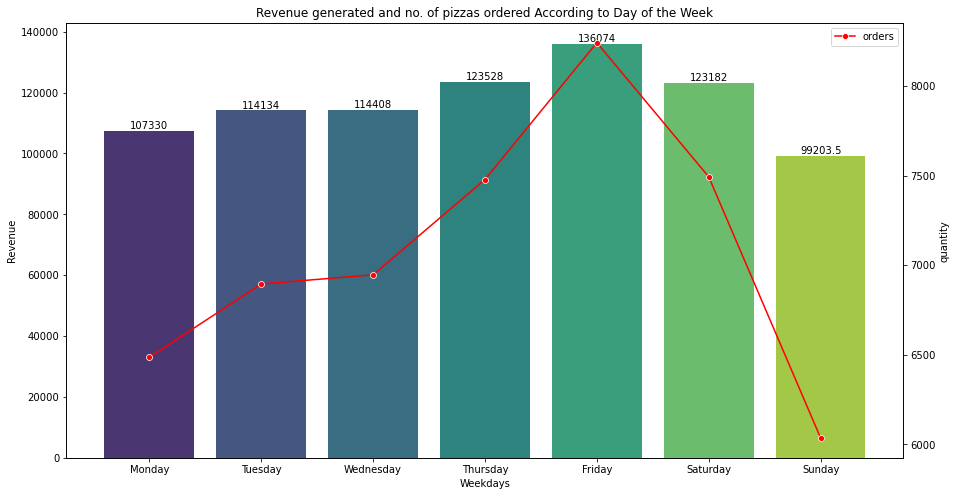

In [36]:
ax1 = sns.set_style()

fig, ax1 = plt.subplots(figsize=(15,8))


ax=sns.barplot( x=weekday_sales['order_day'],y=weekday_sales['total_price'], ax=ax1,label='revenue',palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)

ax2 = ax1.twinx()

#marker in the parameter of lineplot displays shape of marker at each point in the lineplot
sns.lineplot(x=weekday_sales['order_day'],y=weekday_sales['quantity'], marker='o', sort = False, ax=ax2,label='orders',color='r')
ax.set_xlabel('Weekdays')
ax.set_ylabel('Revenue')
plt.title("Revenue generated and no. of pizzas ordered According to Day of the Week")
plt.legend()
plt.show()

# 

In [37]:
# creating a new column for month using dt.month_name()
df['order_month']=df['order_date'].dt.month_name()

### Revenue generated by each month in the year 2015

In [38]:
monthly_orders=df.groupby('order_month')['total_price'].sum().reset_index()

#sorting the data by month and weekday based on calendar using "pd.Categorical"
monthly_orders['order_month'] = pd.Categorical(monthly_orders['order_month'], month_list)
monthly_orders.sort_values(by=['order_month'],inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
monthly_orders.reset_index(drop=True,inplace=True)
monthly_orders

,order_month,total_price
0,January,69793.30
1,February,65159.60
2,March,70397.10
3,April,68736.80
4,May,71402.75
5,June,68230.20
6,July,72557.90
7,August,68278.25
8,September,64180.05
9,October,64027.60


### Bar plot for Revenue generated in each month for year 2015

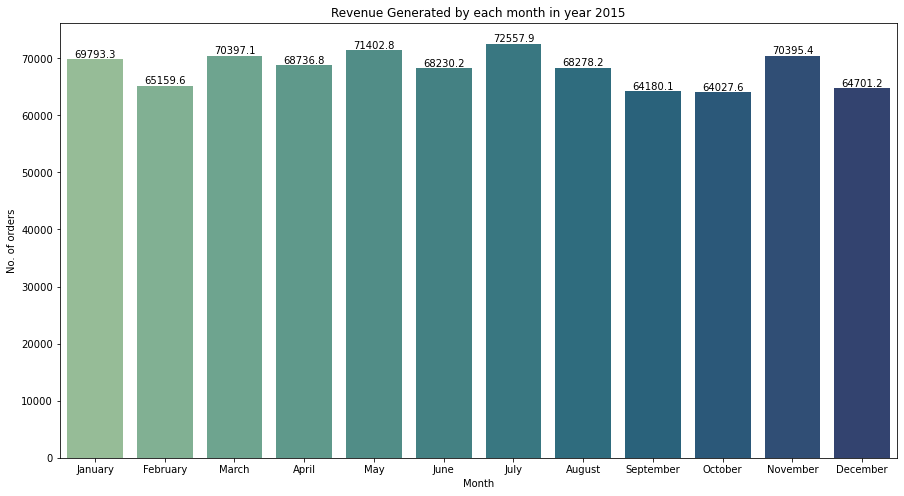

In [39]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='order_month',y='total_price',data=monthly_orders,palette="crest")
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title('Revenue Generated by each month in year 2015')
ax.set_xlabel('Month')
ax.set_ylabel('No. of orders')
plt.show()

#### No. of pizzas sold per each pizza type according to Month of the Year

In [40]:
monthly_pizza_sales = df.groupby(['order_month','pizza_name'])['quantity'].sum().reset_index(name='sale_qty')

#sorting the data by month based on calendar using "pd.Categorical"
monthly_pizza_sales['order_month'] = pd.Categorical(monthly_pizza_sales['order_month'], month_list)
monthly_pizza_sales.sort_values(by=['order_month'],inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
monthly_pizza_sales.reset_index(drop=True,inplace=True)
monthly_pizza_sales.head()

,order_month,pizza_name,sale_qty
0,January,The Four Cheese Pizza,159
1,January,The Barbecue Chicken Pizza,211
2,January,The Big Meat Pizza,150
3,January,The Brie Carre Pizza,35
4,January,The Calabrese Pizza,67


In [41]:
#Creating pivot table for the dataframe 'monthly_pizza_sales' with index as'Month'
pivot_monthly_pizza_sales=monthly_pizza_sales.pivot(index='order_month',columns='pizza_name',values='sale_qty')
pivot_monthly_pizza_sales

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_month,,,,,,,,,,,,,,,,,,,,,
January,211,150,35,67,202,86,77,190,138,159,...,134,191,79,138,153,77,87,126,199,143
February,193,151,44,86,204,74,82,173,113,160,...,123,160,76,155,144,75,81,108,167,141
March,231,176,46,65,194,100,81,204,125,165,...,127,155,78,175,174,92,71,137,213,138
April,214,139,32,83,176,74,89,216,107,162,...,109,155,94,171,152,60,85,120,200,134
May,226,190,46,84,199,85,79,218,124,182,...,114,150,87,155,188,94,85,137,195,109
June,194,139,40,90,222,83,79,197,124,148,...,111,167,85,144,165,90,84,117,188,123
July,219,185,44,83,187,73,85,227,139,162,...,132,151,85,178,193,78,83,127,221,143
August,187,160,43,73,231,83,81,208,113,139,...,121,160,79,170,155,86,84,140,182,122
September,192,142,49,66,177,81,84,209,115,147,...,113,144,65,163,130,88,71,111,203,109


### Heatmap plot for  No. of pizzas sold per each pizza type according to Month of the Year

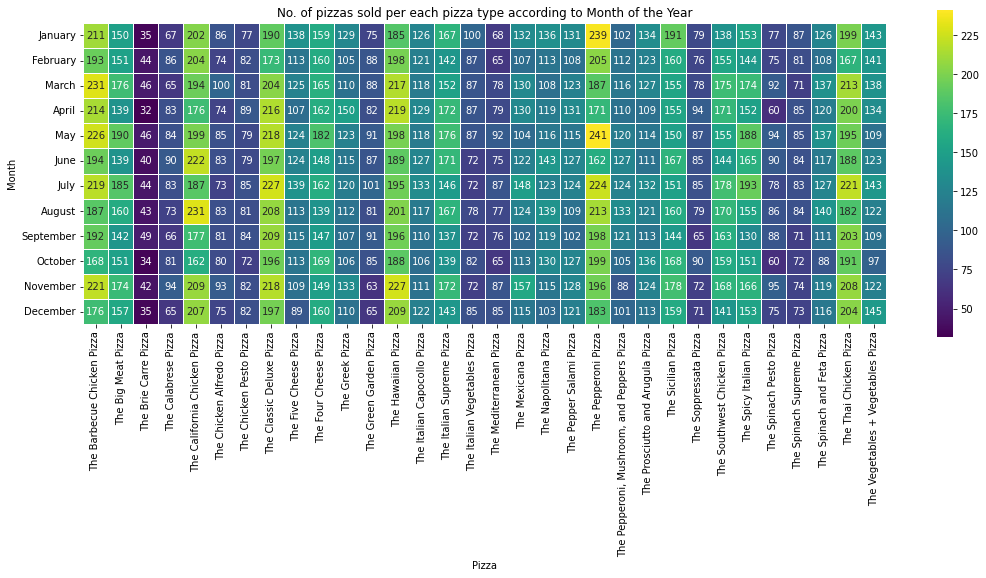

In [42]:
#annot is used to display values in heatmap
#fmt is used to dispay numbers when exponential numbers are displayed('.0f' means '0' decimal numbers displayed)

plt.figure(figsize=(18,6))
sns.heatmap(pivot_monthly_pizza_sales, linewidth = .5,square=True,annot=True,fmt='.0f',cmap='viridis')
plt.title("No. of pizzas sold per each pizza type according to Month of the Year")
plt.xlabel('Pizza')
plt.ylabel('Month')
plt.show()

#### Pizza sales according to week of the day and Month

In [43]:
daywise_orders=df.groupby(['order_day','order_month'])[['quantity','total_price']].sum().reset_index()

#sorting the data by month and weekday based on calendar using "pd.Categorical"
daywise_orders['order_month'] = pd.Categorical(daywise_orders['order_month'], month_list)
daywise_orders['order_day'] = pd.Categorical(daywise_orders['order_day'], day_list)
daywise_orders.sort_values(by=['order_month','order_day'],inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
daywise_orders.reset_index(drop=True,inplace=True)
daywise_orders.head()

,order_day,order_month,quantity,total_price
0,Monday,January,499,8256.55
1,Tuesday,January,561,9404.50
2,Wednesday,January,535,8786.15
3,Thursday,January,735,12079.00
4,Friday,January,740,12147.40


In [44]:
#Creating pivot table for the dataframe 'daywise_orders' with index as'Month'
pivot_daywise_orders=daywise_orders.pivot(index='order_day',columns='order_month',values='quantity')
pivot_daywise_orders

order_month,January,February,March,April,May,June,July,August,September,October,November,December
order_day,,,,,,,,,,,,
Monday,499.0,528.0,690.0,585.0,544.0,730.0,532.0,635.0,522.0,NaN,707.0,513.0
Tuesday,561.0,546.0,751.0,525.0,483.0,664.0,512.0,502.0,731.0,551.0,488.0,581.0
Wednesday,535.0,600.0,519.0,674.0,542.0,500.0,686.0,551.0,667.0,518.0,513.0,641.0
Thursday,735.0,526.0,541.0,705.0,539.0,563.0,705.0,508.0,424.0,851.0,705.0,676.0
Friday,740.0,664.0,644.0,633.0,878.0,620.0,876.0,673.0,510.0,745.0,743.0,516.0
Saturday,716.0,557.0,542.0,586.0,736.0,590.0,624.0,732.0,589.0,753.0,547.0,521.0
Sunday,446.0,540.0,574.0,443.0,606.0,440.0,457.0,567.0,447.0,465.0,563.0,487.0


### Heatmap for pizzas sold per each Day of the week every month

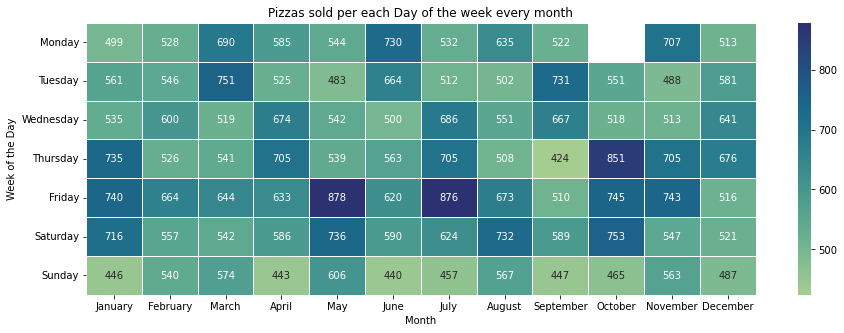

In [45]:
#annot is used to display values in heatmap
#fmt is used to dispay numbers when exponential numbers are displayed('.0f' means '0' decimal numbers displayed)

plt.figure(figsize=(15,5))
sns.heatmap(pivot_daywise_orders, linewidth = .5,cmap='crest',annot=True,fmt='.0f')
plt.title("Pizzas sold per each Day of the week every month")
plt.xlabel('Month')
plt.ylabel('Week of the Day')
plt.show()

#There are no orders on Mondays in October, hence no value is displayed

# 

In [46]:
# Creating a column for Time of the day

df['order_time']=df['order_time'].astype('string')
df[['order_hour','Minute', 'Second']]= df['order_time'].str.split(":",expand=True)
df.drop(['Minute','Second'],axis=1,inplace=True) # removing the columns 'Minute' and 'Second'

#### Pizza sales according to Time of the day for year 2015

In [47]:
hourly_sales=df.groupby('order_hour')[['quantity','total_price']].sum().reset_index()
hourly_sales.sort_values(by='total_price',ascending=False,inplace=True)
hourly_sales

,order_hour,quantity,total_price
3,12,6776,111877.90
4,13,6413,106065.70
9,18,5417,89296.85
8,17,5211,86237.45
10,19,4406,72628.90
7,16,4239,70055.40
5,14,3613,59201.40
11,20,3534,58215.40
6,15,3216,52992.30
2,11,2728,44935.80


### Pizza store was busy during 12pm to 2pm followed by 4-8pm with 5-7pm being busiest in the evening 

# 

### Pizza sales per Day of the week according to each hour

In [48]:
hourly_orders=df.groupby(['order_day','order_hour'])['quantity'].sum().reset_index(name='sale_qty').sort_values(by='sale_qty',ascending=False)

#sorting the data by month and weekday based on calendar using "pd.Categorical"
hourly_orders['order_day'] = pd.Categorical(hourly_orders['order_day'], day_list)
hourly_orders.sort_values(by=['order_day','order_hour'],inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
hourly_orders.reset_index(drop=True,inplace=True)
hourly_orders.head()

,order_day,order_hour,sale_qty
0,Monday,10,3
1,Monday,11,472
2,Monday,12,1126
3,Monday,13,803
4,Monday,14,460


In [49]:
#Creating pivot table for the dataframe 'daywise_orders' with index as'Month'
pivot_hourly_orders=hourly_orders.pivot(index='order_day',columns='order_hour',values='sale_qty')
pivot_hourly_orders

order_hour,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_day,,,,,,,,,,,,,,,
Monday,NaN,3.0,472.0,1126.0,803.0,460.0,411.0,541.0,712.0,666.0,537.0,360.0,278.0,112.0,4.0
Tuesday,4.0,NaN,426.0,1105.0,1018.0,488.0,420.0,630.0,669.0,639.0,600.0,476.0,272.0,148.0,NaN
Wednesday,NaN,5.0,534.0,1058.0,938.0,516.0,465.0,571.0,772.0,756.0,516.0,398.0,271.0,146.0,NaN
Thursday,NaN,5.0,468.0,1149.0,1131.0,574.0,468.0,650.0,856.0,807.0,587.0,451.0,216.0,113.0,3.0
Friday,NaN,NaN,388.0,1101.0,1040.0,525.0,441.0,578.0,759.0,936.0,748.0,706.0,613.0,381.0,26.0
Saturday,NaN,3.0,208.0,633.0,794.0,530.0,525.0,646.0,729.0,881.0,841.0,738.0,591.0,343.0,31.0
Sunday,NaN,2.0,232.0,604.0,689.0,520.0,486.0,623.0,714.0,732.0,577.0,405.0,304.0,143.0,4.0


### heatmap for pizza sales per Day of the week according to each hour

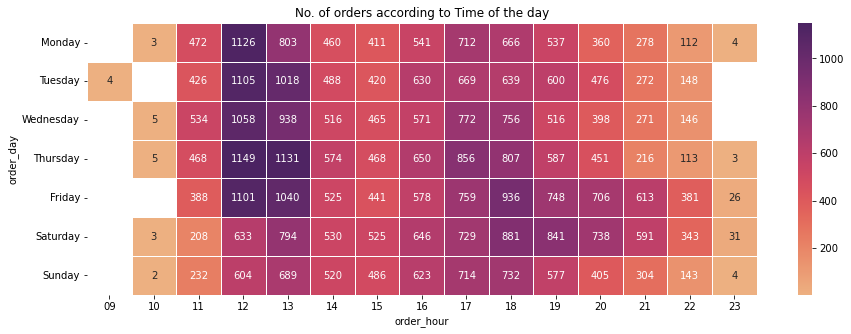

In [50]:
#annot is used to display values in heatmap
#fmt is used to dispay numbers when exponential numbers are displayed('.0f' means '0' decimal numbers displayed)

plt.figure(figsize=(15,5))
sns.heatmap(pivot_hourly_orders, linewidth = .5,cmap='flare',annot=True,fmt='.0f')
plt.title("No. of orders according to Time of the day")
plt.show()

# 

In [51]:
opening=df[df['order_hour']==df['order_hour'].min()][['order_date','pizza_name','order_day','order_hour']]
opening

,order_date,pizza_name,order_day,order_hour
43612,2015-11-24,The Hawaiian Pizza,Tuesday,09
43613,2015-11-24,The Pepper Salami Pizza,Tuesday,09
43614,2015-11-24,The Greek Pizza,Tuesday,09
43615,2015-11-24,The Vegetables + Vegetables Pizza,Tuesday,09


#### The store was opened only once at 9am in the entire year i.e. on 2015-11-24 (Tuesday)

# 

#### Pizza sales per each Category

In [52]:
category_sales=df.groupby('pizza_category')['total_price'].sum().reset_index()
category_sales.set_index('pizza_category',inplace=True)
category_sales

,total_price
pizza_category,
Chicken,195919.50
Classic,220053.10
Supreme,208197.00
Veggie,193690.45


#### Pie chart depicting percentage of pizza sales per each category

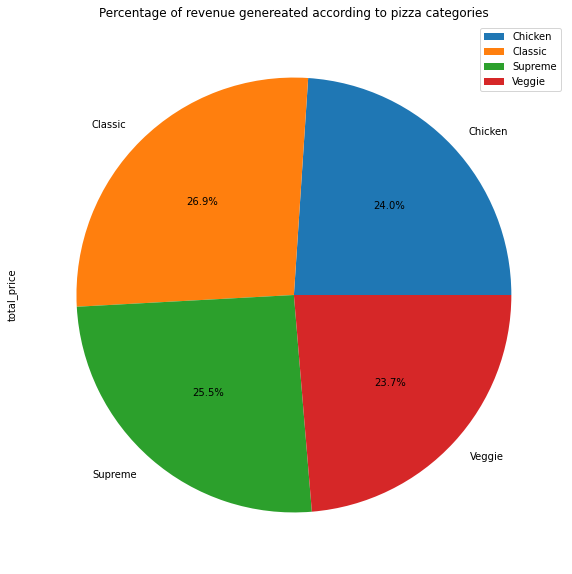

In [53]:
# autopct shows the percentage of the certain element out of the overall distribution
category_sales.plot.pie(y='total_price',figsize=(10,10),autopct='%1.1f%%')
plt.title('Percentage of revenue genereated according to pizza categories')
plt.legend(loc='upper right')
plt.show()

#### Pizza sales per each category according to month

In [54]:
category_by_month=df.groupby(['order_month','pizza_category'])['quantity'].sum().reset_index()
category_by_month['order_month'] = pd.Categorical(category_by_month['order_month'], month_list)

category_by_month.sort_values(by=['order_month','pizza_category'],inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
category_by_month.reset_index(drop=True,inplace=True)
category_by_month.head()

,order_month,pizza_category,quantity
0,January,Chicken,913
1,January,Classic,1257
2,January,Supreme,1044
3,January,Veggie,1018
4,February,Chicken,875


### Count plot for Pizzas Sold category wise Per each Month

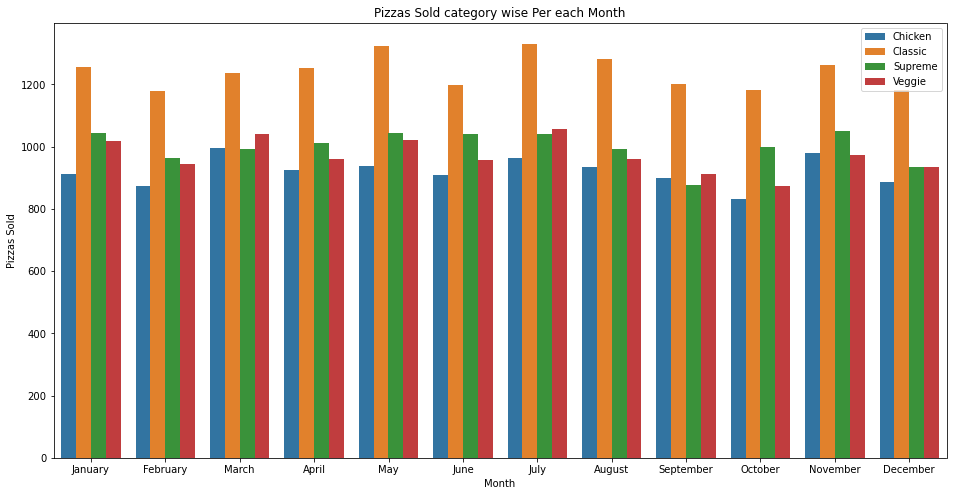

In [55]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x='order_month',y='quantity', hue='pizza_category',data=category_by_month)

ax.set_title('Pizzas Sold category wise Per each Month')
ax.set_xlabel('Month')
ax.set_ylabel('Pizzas Sold')
plt.legend(loc='best')
plt.show()

#### Pizza sales per each pizza size according to month

In [56]:
size_by_month=df.groupby(['order_month','pizza_size'])['quantity'].sum().reset_index()
size_by_month['order_month'] = pd.Categorical(size_by_month['order_month'], month_list)
size_by_month['pizza_size'] = pd.Categorical(size_by_month['pizza_size'], pizza_size_list)
size_by_month.sort_values(by=['order_month','pizza_size'],inplace=True)

# resetting index values, drop=True dictates old index is not added as a column, Inplace=True makes changes permanent
size_by_month.reset_index(drop=True,inplace=True)
size_by_month.head()

,order_month,pizza_size,quantity
0,January,S,1229
1,January,M,1311
2,January,L,1640
3,January,XL,50
4,January,XXL,2


### Lineplot for Pizzas Ordered pizza size wise per each month

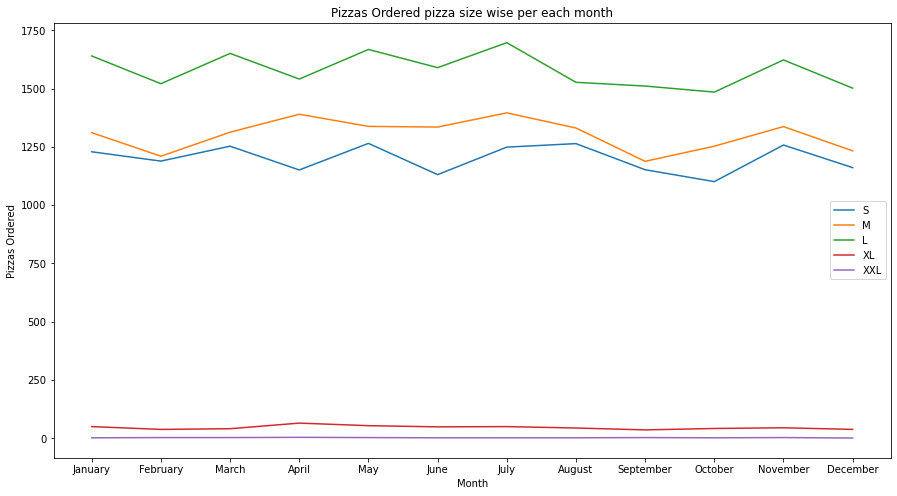

In [57]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='order_month',y='quantity', hue='pizza_size',data=size_by_month)
ax.set_title('Pizzas Ordered pizza size wise per each month')
ax.set_xlabel('Month')
ax.set_ylabel('Pizzas Ordered')
plt.legend(loc = 'best')   # legend to display the label in the graph (best is used to set label at best suited location)
plt.show()

### Revenue generated by each pizza size

In [58]:
pizza_size_orders=df.groupby('pizza_size')['total_price'].sum().reset_index()
pizza_size_orders['pizza_size'] = pd.Categorical(pizza_size_orders['pizza_size'], ['S','M','XL','L','XXL'])
pizza_size_orders.sort_values(by='pizza_size',inplace=True)
pizza_size_orders.set_index('pizza_size',inplace=True)
pizza_size_orders

,total_price
pizza_size,
S,178076.50
M,249382.25
XL,14076.00
L,375318.70
XXL,1006.60


### Pie chart depicting revenue generated by each pizza size

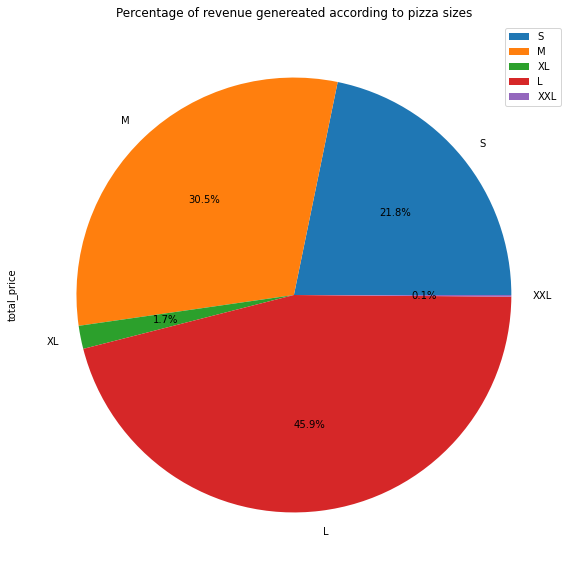

In [59]:
# autopct shows the percentage of the certain element out of the overall distribution
pizza_size_orders.plot.pie(y='total_price',figsize=(10,10),autopct='%1.1f%%')
plt.title('Percentage of revenue genereated according to pizza sizes')
plt.legend(loc='upper right')
plt.show()

# 

In [61]:
opening_closing_revenue=hourly_sales.tail(3)['total_price'].sum()
Updated_revenue=Total_revenue-opening_closing_revenue
print(f'Revenue if opening and closing hours are altered is ${Updated_revenue//1000}K')

Revenue if opening and closing hours are altered is $816.0K


#### Finding Most and Least used ingredients

In [62]:
#This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers

from collections import Counter

# Counter is a subclass of dict that’s specially designed for counting hashable objects in Python
# It’s a dictionary that stores objects as keys and counts as values.

results = Counter()
df['pizza_ingredients'].str.lower().str.split(',').apply(results.update)
print(results)

Counter({' garlic': 27422, ' tomatoes': 23694, ' red onions': 19547, ' red peppers': 16284, 'chicken': 8443, ' mushrooms': 8114, ' mozzarella cheese': 6605, ' pepperoni': 6542, ' green olives': 6174, ' artichokes': 5682, ' jalapeno peppers': 5643, 'spinach': 5239, ' green peppers': 5224, ' spinach': 4773, ' feta cheese': 4748, ' pineapple': 4685, 'pepperoni': 3758, 'mozzarella cheese': 3728, ' asiago cheese': 3342, ' cilantro': 3341, ' corn': 3341, ' chipotle sauce': 3341, 'capocollo': 3301, ' goat cheese': 3301, ' capocollo': 3271, ' fontina cheese': 3259, 'tomatoes': 2907, ' pesto sauce': 2893, ' zucchini': 2485, ' bacon': 2416, 'barbecued chicken': 2372, ' barbecue sauce': 2372, 'sliced ham': 2370, ' thai sweet chilli sauce': 2315, ' artichoke': 2302, ' gouda cheese': 2302, ' peperoncini verdi': 1887, 'coarse sicilian salami': 1887, ' luganega sausage': 1887, ' onions': 1887, ' sun-dried tomatoes': 1880, ' kalamata olives': 1863, 'ricotta cheese': 1850, ' gorgonzola piccante cheese'